In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate  

In [78]:
def f(x):
    return x**3-4*x-9

In [79]:
x1,x2=2,3

In [80]:
x_vals=np.linspace(x1-1,x2+1,50)
y_vals=f(x_vals)

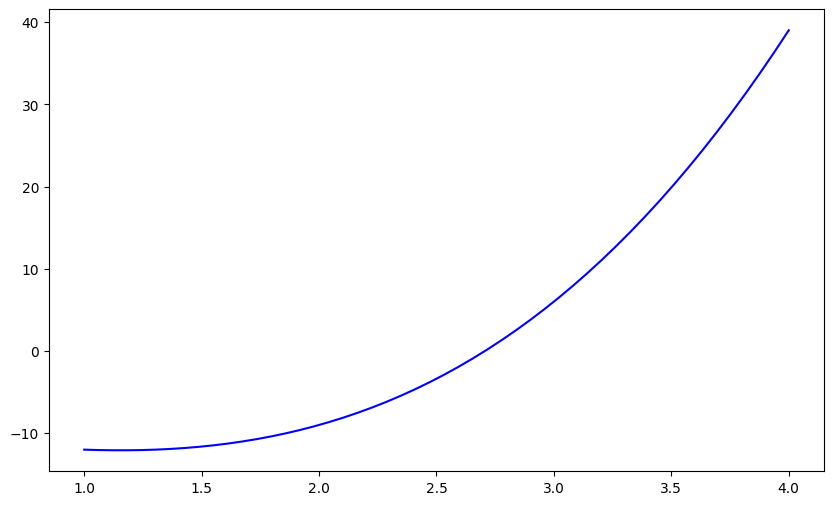

In [81]:
plt.figure(figsize=(10,6))
plt.plot(x_vals,y_vals,label="f(x)=x^3-4x-9",color="blue")

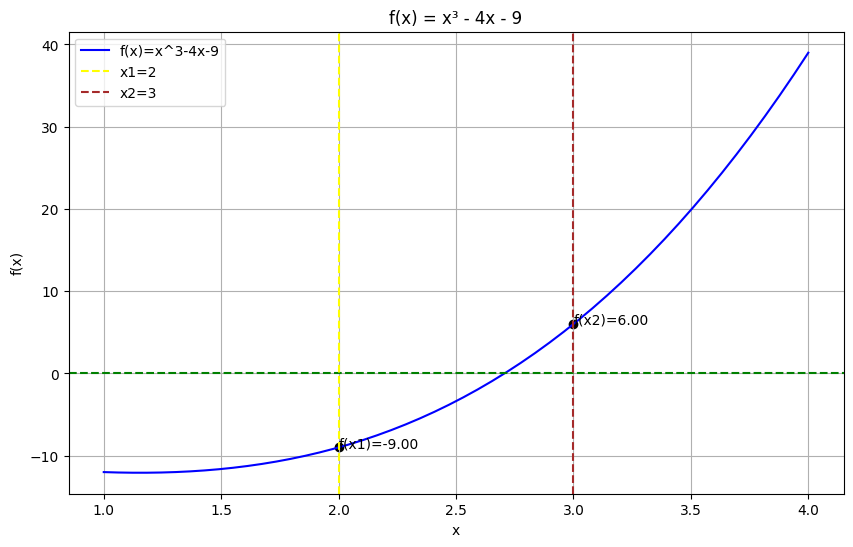

In [82]:
plt.figure(figsize=(10,6))
plt.plot(x_vals,y_vals,label="f(x)=x^3-4x-9",color="blue")
plt.axhline(0,color="green",linestyle="--")
plt.axvline(x1,color="yellow",linestyle="--",label=f"x1={x1}")
plt.axvline(x2,color="brown",linestyle="--",label=f"x2={x2}")

plt.scatter([x1,x2],[f(x1),f(x2)],color="black")
plt.text(x1, f(x1), f"f(x1)={f(x1):.2f}")
plt.text(x2, f(x2), f"f(x2)={f(x2):.2f}")
plt.title("f(x) = x³ - 4x - 9")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()


## Bisection

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

def f(x): return x**3 - 4*x - 9

def bisection(f, a, b, tol=1e-5, max_iter=50):
    res = []
    prev = None
    for i in range(max_iter):
        m = (a + b) / 2
        fm = f(m)
        err = abs((m - prev) / m) * 100 if prev is not None else None
        res.append([i + 1, a, b, m, fm, b - a, err])
        if abs(fm) < tol or (b - a) / 2 < tol: break
        a, b = (a, m) if f(a) * fm < 0 else (m, b)
        prev = m
    return res


In [84]:
# Define the function
def f(x):
    return x**3 - 4*x - 9


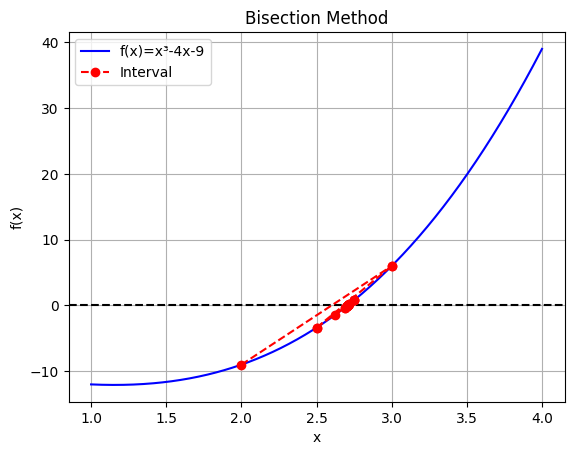

+-------------+---------+---------+---------+--------------+------------------+-------------------------------+
|   Iteration |      x1 |      x2 |       m |         f(m) |   Interval Width |   Absolute Relative Error (%) |
+=============+=========+=========+=========+==============+==================+===============================+
|           1 | 2       | 3       | 2.5     | -3.375       |      1           |                 nan           |
+-------------+---------+---------+---------+--------------+------------------+-------------------------------+
|           2 | 2.5     | 3       | 2.75    |  0.796875    |      0.5         |                   9.09091     |
+-------------+---------+---------+---------+--------------+------------------+-------------------------------+
|           3 | 2.5     | 2.75    | 2.625   | -1.41211     |      0.25        |                   4.7619      |
+-------------+---------+---------+---------+--------------+------------------+-------------------------

In [85]:
x1, x2, tol = 2, 3, 1e-5
res = bisection(f, x1, x2, tol)
cols = ["Iteration", "x1", "x2", "m", "f(m)", "Interval Width", "Absolute Relative Error (%)"]
df = pd.DataFrame(res, columns=cols)

xv = np.linspace(x1 - 1, x2 + 1, 500)
plt.plot(xv, f(xv), label="f(x)=x³-4x-9", color="blue")
plt.axhline(0, color="black", ls="--")
for i, r in df.iterrows():
    plt.plot([r["x1"], r["x2"]], [f(r["x1"]), f(r["x2"])], 'ro--', label="Interval" if i == 0 else "")
plt.title("Bisection Method")
plt.xlabel("x"), plt.ylabel("f(x)")
plt.legend(), plt.grid()
plt.show()

print(tabulate(df, headers="keys", tablefmt="grid", showindex=False))
